[3.55499, 1.51921, 3.43348, 1.58165, 3.67164, 1.44311, 3.55499, 1.51921, 3.55499, 1.51921, 3.49665, 1.41882, 3.55499, 1.51921, 3.62095, 1.63273, 3.15472, 1.6875, 3.43348, 1.58165, 3.43348, 1.58165, 3.35371, 1.36707, 3.43348, 1.58165, 3.47588, 1.73059, 3.43348, 1.58165, 3.34592, 1.75605, 3.43348, 1.58165, 3.28775, 1.51552, 3.43348, 1.58165, 3.49665, 1.41882, 3.43348, 1.58165, 3.60883, 1.65774, 3.99535, 1.72737, 3.98749, 1.83602, 4.00322, 1.61872, 3.99535, 1.72737, 3.99535, 1.72737, 4.18783, 1.74641, 3.99535, 1.72737, 4.10464, 1.63533, 3.99535, 1.72737, 4.08818, 1.83759, 3.98749, 1.83602, 3.78061, 1.84806, 3.98749, 1.83602, 3.99836, 2.09996, 3.98749, 1.83602, 3.86238, 1.97421, 3.98749, 1.83602, 3.881, 1.72802, 3.98749, 1.83602, 4.08818, 1.83759, 4.04414, 1.4483, 4.00322, 1.61872, 3.8638, 1.59787, 4.00322, 1.61872, 4.00322, 1.61872, 3.88073, 1.71677, 4.00322, 1.61872, 3.91829, 1.49279, 4.00322, 1.61872, 4.10475, 1.63448, 4.04414, 1.4483, 4.1379, 1.48345, 3.95687, 1.38119, 4.04414, 1.4483,

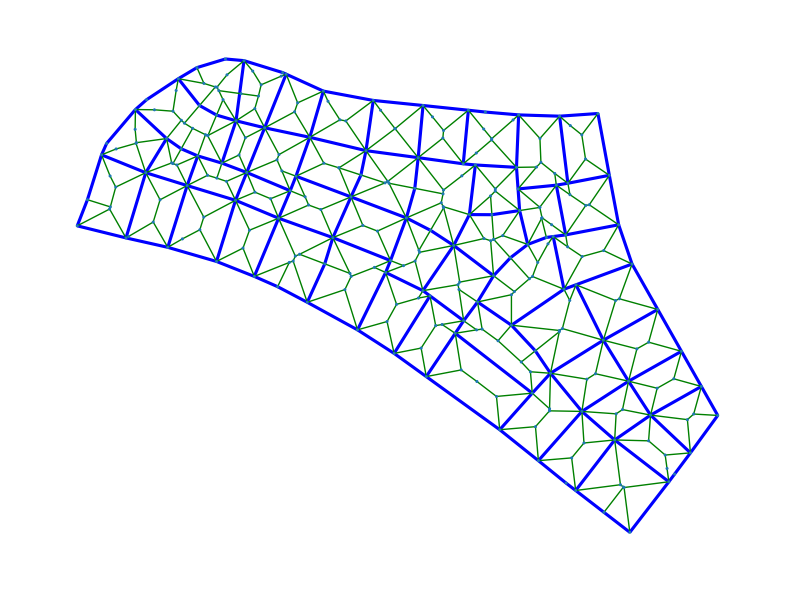

In [1]:
######################################################################
############################## Add Path ##############################
######################################################################
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir) 


import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import time

import DebugAndPreview as DP




#######################################################################
###############   Input the name of site   ############################
#######################################################################
siteName = "punggol_1_withShortcut_withConfigAll_StraightSkeleton_SinglePOI"


#######################################################################
############################## Load File ##############################
#######################################################################
jsonName = siteName + ".json"                             
jsonPath = parent_dir + "/JSONInput/" + jsonName

###### Ignore incase of considering small parcel identification
myG,myNodeDict,myEdgeDict = mgh.GraphFromJSON_Customized_IgnoreShortCut(jsonPath,scaleTag=True,new_min = 0,new_max = 5)   # 5


#######################################################################
####################### Build the graph ###############################
#######################################################################

###### Initialize info ######
myG.define_roads_FirstTime()                 # Road
myG.define_interior_parcels()                # Interior_Parcels   ， in this case, it is None

###### Add shortcut back into the graph
myG.AddShortCutInGraph()

######  Feature and property ######
myG.td_dict_init()
myG.feature_init()
myG.td_dict_POI_Related_init()


#######################################################################
####### Save this original state to mg before the road building #######
#######################################################################
save_dir = parent_dir + "/data"
DP.SaveGraph_mg(myG,save_dir,siteName)


#######################################################################
###################### Preview the graph ##############################
#######################################################################

###### Preview the graph ######
myG.plot_roads(parcel_labels=True)
plt.plot()


DP.PrintEdgeCoords(myG.edge_list)